<a href="https://colab.research.google.com/github/Meowmixforme/Kaggle_Machine_Learning_Projects/blob/main/Project%203%20Exoplanet%20Hunting%20Using%20Machine%20Learning/Exo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exoplanet Hunting

Author: James Fothergill

Import Packages

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

Getting the data

In [77]:
train_df = pd.read_csv("/content/exoTrain.csv")
train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [78]:
# Shape of the training df

train_df.shape

(5087, 3198)

Check for missing values (there are none)

In [79]:
# Display the rows with null values in df

train_df[train_df.isnull().any(axis=1)]

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197


<Axes: >

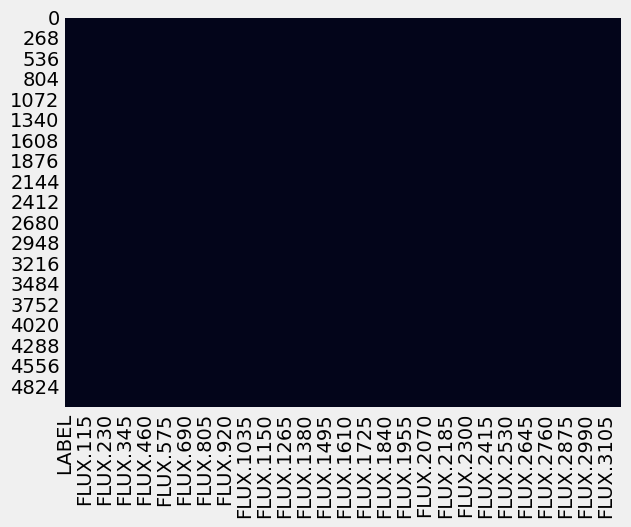

In [80]:
# Display null values in train df
sns.heatmap(train_df.isnull(), cbar=False)

Decoding labels in the data

In [81]:
# Check how many labels are present in train df

train_df['LABEL'].value_counts()

,count
LABEL,
1,5050
2,37


In [82]:
# Extract the index for the stars labelled as 2

list(train_df[train_df['LABEL'] ==2].index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36]

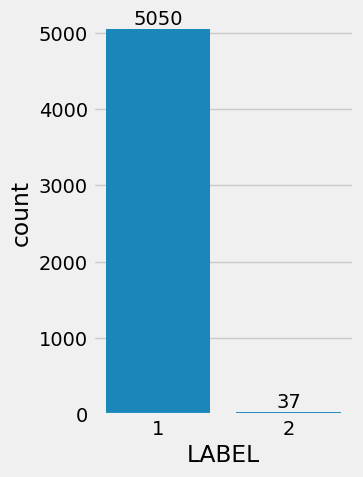

In [83]:
plt.figure(figsize=(3,5))
ax = sns.countplot(x='LABEL', data=train_df) # Specify 'x=' for the column
ax.bar_label(ax.containers[0])
plt.show()

Replacing the labels

In [84]:
# Replacing labels

train_df['LABEL'] = train_df['LABEL'].replace({2: 1, 1: 0})
train_df.LABEL.unique()

array([1, 0])

In [85]:
plot_df = train_df.drop(columns=['LABEL'], axis=1)
plot_df.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


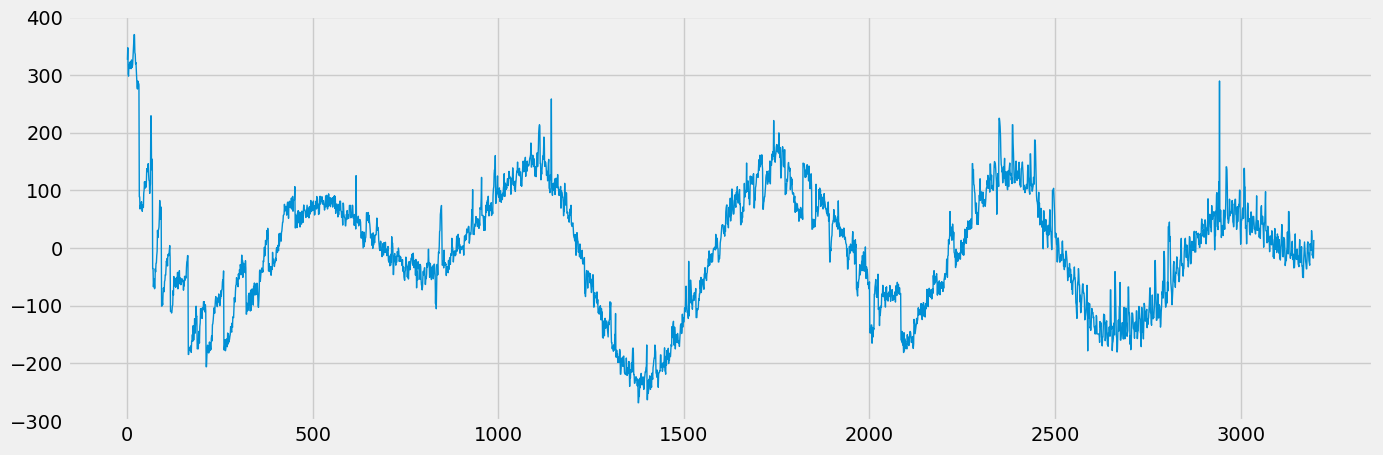

In [86]:
# Plot a random star from the plot df

time = range(1, 3198)
flux_val = plot_df.iloc[3,:].values
plt.figure(figsize=(15,5))
plt.plot(time, flux_val, linewidth = 1)
plt.show()

Removing outliers

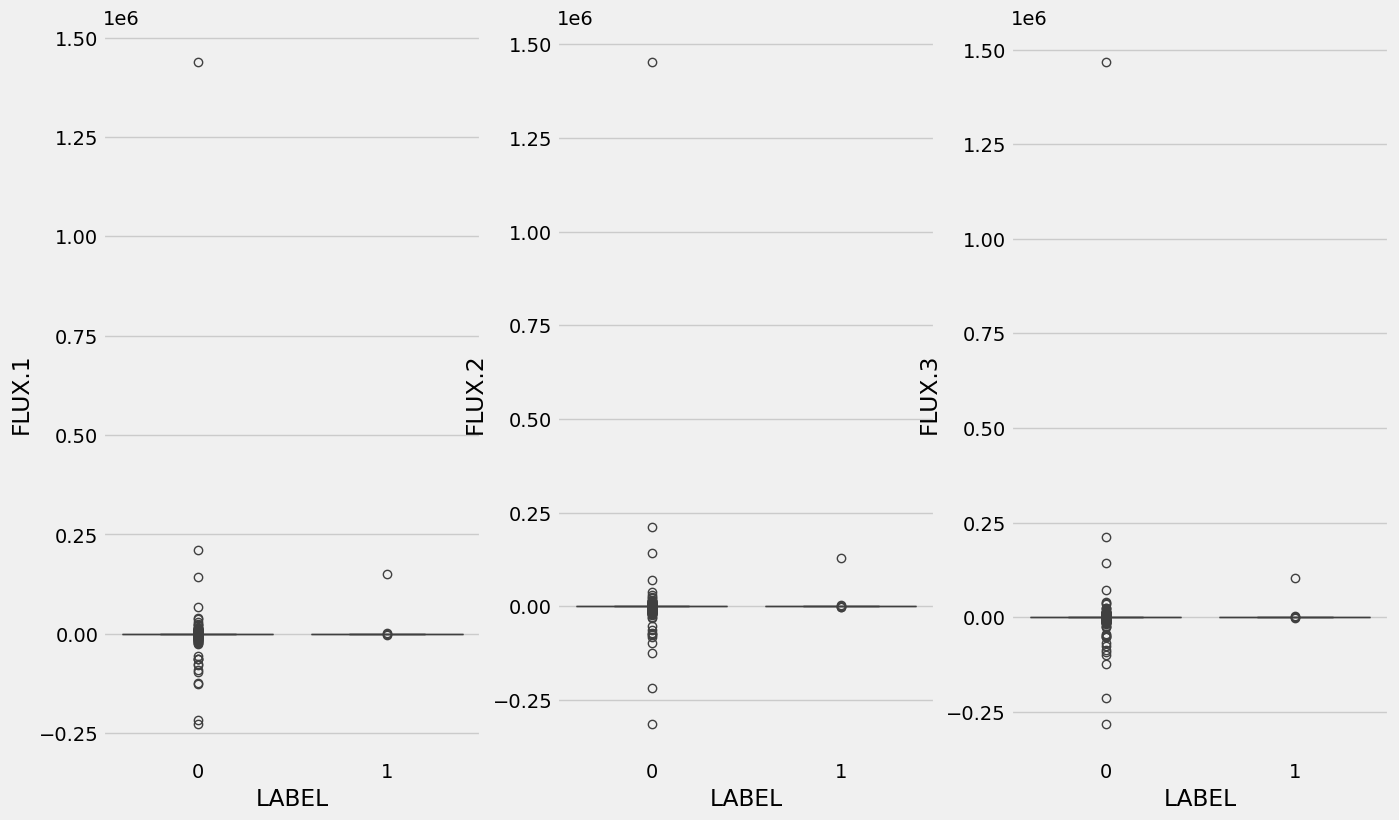

In [87]:
plt.figure(figsize = (20, 9))
for i in range (1, 4):
  plt.subplot(1, 4, i)
  sns.boxplot(data= train_df, x= 'LABEL', y= 'FLUX.' + str(i))

In [88]:
# Dropping outliers

train_df.drop(train_df[train_df['FLUX.2'] > 0.25e6].index, axis=0, inplace=True)

<Axes: xlabel='LABEL', ylabel='FLUX.56'>

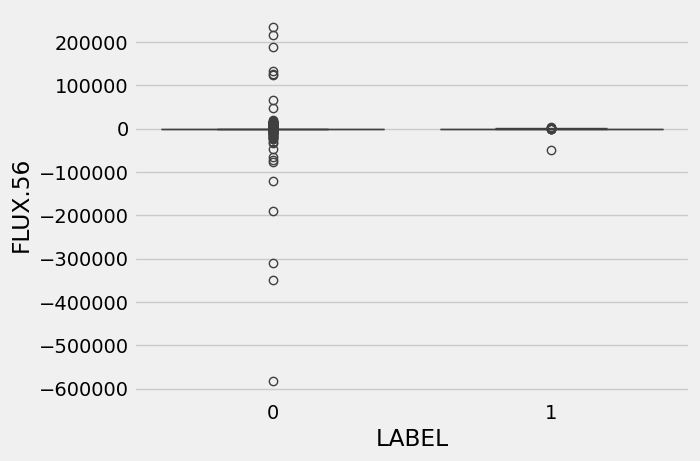

In [89]:
sns.boxplot(data= train_df, x= 'LABEL', y= 'FLUX.' + str(np.random.randint(1000)))

Splitting data into Train / Test

In [90]:
# Extracing independent (x) and dependent (y) features from train df

x = train_df.drop(columns=['LABEL'], axis=1)
y = train_df['LABEL']

In [91]:
# Splitting data into train and test sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [92]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

Feature scaling

In [93]:
np.min(x_train_sc), np.max(x_train_sc)

(np.float64(-56.48749088708406), np.float64(59.43945673910838))

Handling imbalanced data

In [94]:
# Random oversampling (applied ONLY to the scaled training data)

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_train_ros, y_train_ros = ros.fit_resample(x_train_sc, y_train)

<Axes: xlabel='LABEL'>

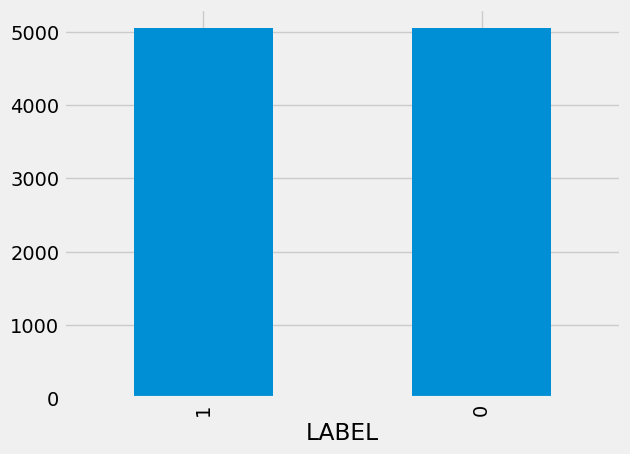

In [95]:
y_ros.value_counts().plot(kind = 'bar')

In [96]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_ros)))

Original dataset shape Counter({0: 5049, 1: 37})
Resampled dataset shape Counter({1: 5049, 0: 5049})


KNN

In [133]:
# Fitting KNN classifier model on the train data

from sklearn.neighbors import KNeighborsClassifier as KNC

# choosing k as value found below
knn_clsfr = KNC(n_neighbors=1, metric = 'minkowski', p=2)

# Fitting the model
knn_clsfr.fit(x_train_ros, y_train_ros)

# Results

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
pred = knn_clsfr.predict(x_test_sc)

print("Validation accuracy of KNN:-", accuracy_score(y_test, pred))
print("Confusion Matrix", confusion_matrix(y_test, pred))
print("Classification report:- \n", classification_report(y_test, pred))

Validation accuracy of KNN:- 0.9836173001310616
Confusion Matrix [[1501   13]
 [  12    0]]
Classification report:- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1514
           1       0.00      0.00      0.00        12

    accuracy                           0.98      1526
   macro avg       0.50      0.50      0.50      1526
weighted avg       0.98      0.98      0.98      1526



Choosing value of K with minimum error

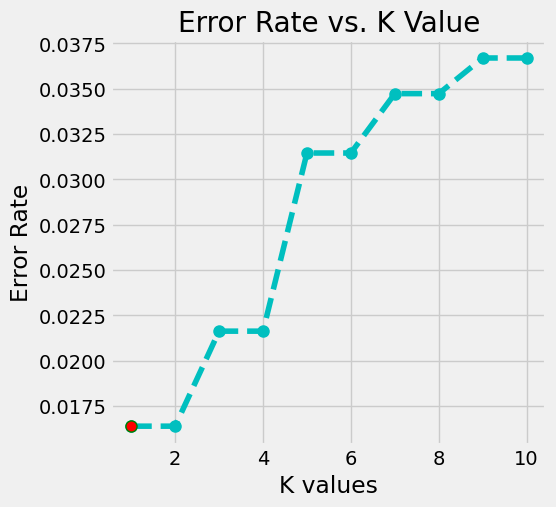

In [119]:
err_rate = []

for K in range (1, 11):
  knn_clsfr = KNC(n_neighbors=K)
  knn_clsfr.fit(x_train_ros, y_train_ros)
  pred_i = knn_clsfr.predict(x_test_sc)
  err_rate.append(np.mean(pred_i != y_test))

# Find the K value with the minimum error
arg, val = err_rate.index(min(err_rate)), min(err_rate)

# Plot the error rate vs. K value
plt.figure(figsize=(5,5))
plt.plot(range(1,11), err_rate, 'co--', markersize = 8)
plt.plot(arg+1, val, marker = 'o', markersize = 8, markerfacecolor = 'r', markeredgecolor = 'g')
plt.title('Error Rate vs. K Value')
plt.xlabel('K values')
plt.ylabel('Error Rate')
plt.show()


KNN can accurately

Random Forest

Random Forest Classifier Results:

Validation accuracy: 0.9921363040629095

Confusion Matrix:
 [[1514    0]
 [  12    0]]

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1514
           1       0.00      0.00      0.00        12

    accuracy                           0.99      1526
   macro avg       0.50      0.50      0.50      1526
weighted avg       0.98      0.99      0.99      1526


AUC-ROC: 0.6047721268163805


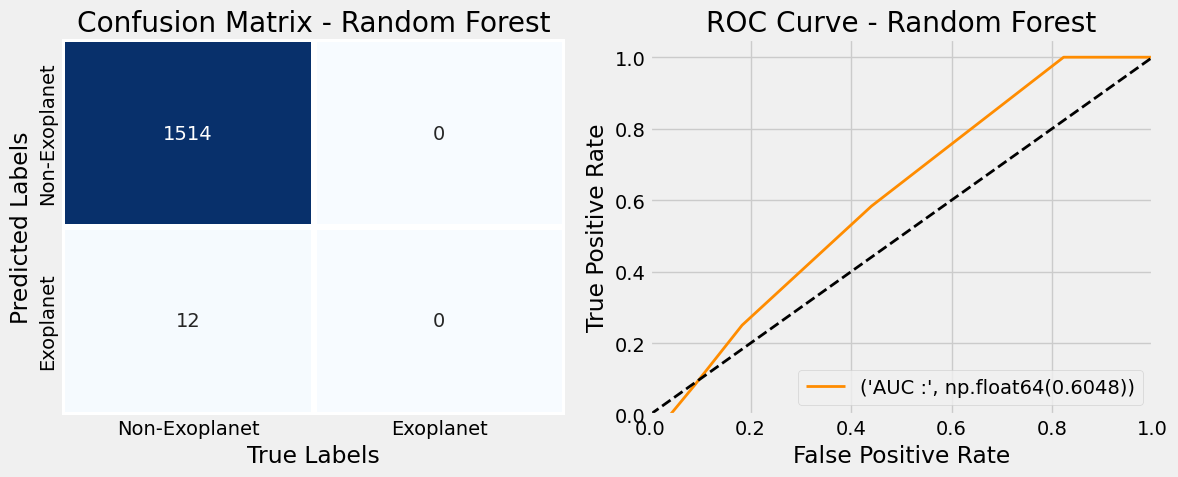

In [134]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
# You can tune hyperparameters like n_estimators, max_depth, min_samples_split, etc.
# Setting class_weight='balanced' can help address imbalance within the Random Forest itself
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Fit the model on the scaled training data
rf_classifier.fit(x_train_sc, y_train)

# Make predictions on the scaled test data
y_pred = rf_classifier.predict(x_test_sc)

# Evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

print("Random Forest Classifier Results:")
print("\nValidation accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

# Calculate and print AUC-ROC
# Random Forest provides probabilities
predicting_probabilities = rf_classifier.predict_proba(x_test_sc)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, predicting_probabilities)
auc_roc = auc(fpr, tpr)
print("\nAUC-ROC:", auc_roc)

# Optional: Plot Confusion Matrix and ROC Curve
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Plot Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d", linewidths=3, cbar=False,
            xticklabels=['Non-Exoplanet', 'Exoplanet'], yticklabels=['Non-Exoplanet', 'Exoplanet'])
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix - Random Forest")

# Plot ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=("AUC :", round(auc_roc, 4)), color="darkorange", lw=2)
plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()